## Kuramoto order parameter

In [6]:
import numpy as np 
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
import os, sys
rootpath = os.path.join(os.getcwd(), '..')
sys.path.append(rootpath)

import pandas as pd
# import pickle

# import gzip

from os.path import isfile
import json



# load path_figures from config_user.json if it exists
path_config = "../config_user.json"
if isfile(path_config):
    with open(path_config, 'r') as f:
        config = json.load(f)
else:
    with open("../config_default.json", 'r') as f:
        config = json.load(f)

path_figures = config["path_figures"]
path_data = config["path_data"]
print(path_figures)
print(path_data)




/Users/johannes/research/figures_perspective_heart_brain/subfigures/
/Users/johannes/research/figures_perspective_heart_brain/data/


In [2]:
savefig_args = {
    'transparent': True,
    'format': 'pdf',
    'dpi': 300,
}
plt.text.usetex : True
# font size
plt.rcParams.update({'font.size': 8})
# # tick size
plt.rcParams['xtick.labelsize'] = 6
plt.rcParams['ytick.labelsize'] = 6

# native unit is inches, convert to mm by introducting a "unit scale" that is used as scalar * mm (e.g. 1*mm = 1/25.4 in inch)
mm = 1/25.4  # mm in inches

In [48]:
files = {
    "FHN_2D_diffusion_toyheart" : path_data + "FHN_2D_diffusion_Kuramoto.txt",
    "FHN_erdos_renyi_toybrain" : path_data + "FHN_erdos_renyi_Kuramoto.txt",
}

In [49]:
# load data
data = {}
for key, filename in files.items():
    if isfile(filename):
        data[key] = pd.read_csv(filename, sep=' ')
    else:
        raise ValueError(f"{filename} not found")

In [50]:
for key, value in data.items():
    print(key)
    print(value.head())

FHN_2D_diffusion_toyheart
      p         1         2         3         4         5         6         7  \
0  0.00  0.995658  0.995663  0.995660  0.995653  0.995657  0.995662  0.995649   
1  0.01  0.994933  0.994894  0.994917  0.995145  0.994927  0.995040  0.994765   
2  0.02  0.994420  0.994816  0.994459  0.994628  0.994419  0.994717  0.993572   
3  0.03  0.993831  0.993890  0.993674  0.994084  0.993963  0.994390  0.993169   
4  0.04  0.993208  0.993313  0.993799  0.992859  0.992631  0.994104  0.993235   

          8         9  ...        91        92        93        94        95  \
0  0.995652  0.995659  ...  0.995669  0.995658  0.995659  0.995643  0.995663   
1  0.994739  0.995230  ...  0.995139  0.994904  0.994999  0.995185  0.995238   
2  0.994080  0.994718  ...  0.994472  0.994532  0.994142  0.994951  0.994636   
3  0.993489  0.994185  ...  0.993965  0.994474  0.994314  0.994297  0.994213   
4  0.992928  0.993870  ...  0.993656  0.994080  0.993867  0.993988  0.993643   

      

FHN_2D_diffusion_toyheart
FHN_erdos_renyi_toybrain


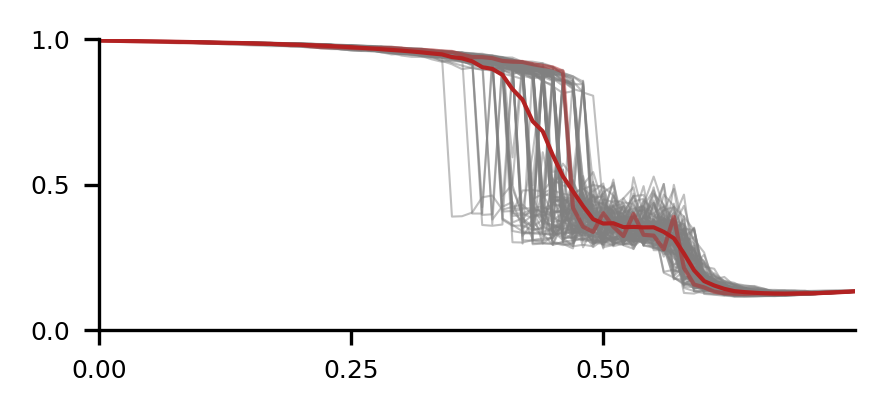

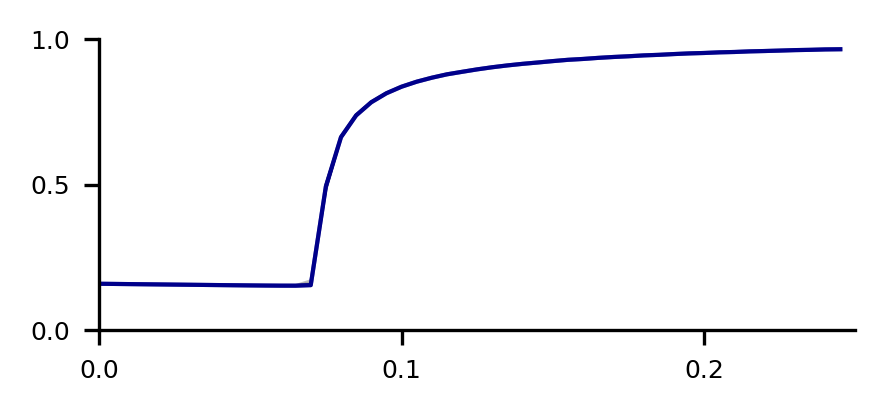

In [67]:
width = 70 * mm
height = 30 * mm

# specify x-ranges
x_range = {
    "FHN_2D_diffusion_toyheart" : [0, 0.75],
    "FHN_erdos_renyi_toybrain" : [0, 0.25],
}
# specify x-ticks
x_ticks = {
    "FHN_2D_diffusion_toyheart" : [0, 0.25, 0.5],
    "FHN_erdos_renyi_toybrain" : [0, 0.1, 0.2],
}
# specify color
color = {
    "FHN_2D_diffusion_toyheart" : 'firebrick',
    "FHN_erdos_renyi_toybrain" : 'darkblue',
}

# iterate over data and plot
for (label, value) in data.items():
    print(label)
    fig = plt.figure(figsize=(width, height), dpi=300)
    # left, bottom, width, height
    ax = plt.axes([0.085, 0.15, 0.915, 0.82], frameon=True)

    # remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.set_ylim([0,1])
    ax.set_yticks([0,0.5,1])

    ax.set_xlim(x_range[label])
    ax.set_xticks(x_ticks[label])

    # plot all signals from the data frame (column one is x-axis)
    for idx in range(1, value.shape[1]):
        ax.plot(value.iloc[:,0], value.iloc[:,idx], lw=0.5, color='gray', alpha=0.5)

    # plot random signal for illustration
    ax.plot(value.iloc[:,0], value.iloc[:,1], lw=1.0, color=color[label], alpha=0.5)

    # plot mean signal
    ax.plot(value.iloc[:,0], value.iloc[:,1:].mean(axis=1), lw=1, color=color[label])

    # save figure 
    fig.savefig(path_figures+f"{label}_kuramoto.pdf", **savefig_args)